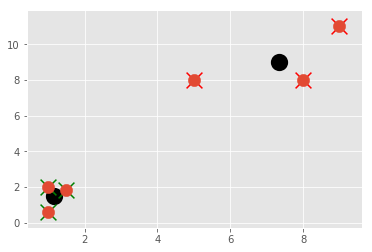

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np


style.use('ggplot')


class KMeans:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]  # first k centroids
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for j in range(self.k):
                self.classifications[j] = []
                
            for feature_set in data:
                distances = [np.linalg.norm(feature_set - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(feature_set)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
    
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        
        return classification


X = np.array([[1, 2], [1.5, 1.8], [5, 8 ], [8, 8], [1, 0.6], [9, 11]])
colors = 10 * ['g', 'r', 'c', 'b', 'k']

classifier = KMeans()
classifier.fit(X)

for centroid in classifier.centroids:
    plt.scatter(classifier.centroids[centroid][0], classifier.centroids[centroid][1], marker='o',
                color='k', s=150, linewidths=5)
    
for classification in classifier.classifications:
    color = colors[classification]
    
    for feature_set in classifier.classifications[classification]:
        plt.scatter(feature_set[0], feature_set[1], color=color, marker='x', s=250, linewidths=5)

plt.scatter(X[:, 0], X[:, 1], s=150)
plt.show()
